### Librerias 

### 1. Manejo de datos y estructuras

- `pandas` → Manejo de DataFrames y operaciones con datos.
- `numpy` → Cálculos numéricos y creación de matrices.

### 2. Modelado y algoritmos de aprendizaje automático

- `sklearn.model_selection.train_test_split` → División del conjunto de datos en entrenamiento y prueba.
- `sklearn.model_selection.GridSearchCV` → Búsqueda de hiperparámetros óptimos.
- `sklearn.ensemble.GradientBoostingClassifier` → Clasificador basado en Gradient Boosting.
- `xgboost` → Modelos basados en boosting.
- `sklearn.svm.SVC` → Máquina de soporte vectorial.
- `imblearn.over_sampling.SMOTE` → Sobremuestreo para equilibrar clases desbalanceadas.

### 3. Evaluación de modelos

- `sklearn.metrics.accuracy_score` → Cálculo de la precisión.
- `sklearn.metrics.classification_report` → Generación de informe de clasificación.
- `sklearn.metrics.confusion_matrix` → Cálculo de la matriz de confusión.

### 4. Preprocesamiento de datos

- `sklearn.preprocessing.StandardScaler` → Normalización de características.

### 5. Visualización de datos

- `seaborn` → Visualización avanzada de datos (gráficos y matrices).
- `matplotlib.pyplot` → Creación de gráficos.

### 6. Manejo de pipelines

- `sklearn.pipeline.Pipeline` → Creación de pipelines para procesamiento y modelado.

### 7. Manejo de flujo de trabajo y seguimiento de experimentos

- `mlflow` → Seguimiento y gestión de experimentos de machine learning.
- `mlflow.sklearn` → Manejo de modelos de scikit-learn con MLflow.
- `mlflow.xgboost` → Manejo de modelos de XGBoost con MLflow.

### 8. Manejo de clases desbalanceadas

- `imblearn.over_sampling.SMOTE` → Técnica de sobremuestreo para manejo de clases desbalanceadas.
- `collections.Counter` → Conteo de elementos en una colección.

In [0]:
# 1. Manejo de datos y estructuras
import numpy as np
import pandas as pd

In [0]:
# 2. Modelado y algoritmos de aprendizaje automático
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [0]:
# 3. Evaluación de modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
# 4. Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler

# 5. Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# 6. Manejo de pipelines
from sklearn.pipeline import Pipeline

# 7. Manejo de flujo de trabajo y seguimiento de experimentos
import mlflow
import mlflow.sklearn
import mlflow.xgboost

# 8. Manejo de clases desbalanceadas
from collections import Counter

### Cargar Datos

A continuación, se definen los identificadores de las columnas correspondientes a las variables del conjunto de datos, tales como "Alcohol", "Malic Acid" y "Total Phenols". Posteriormente, se emplea la **biblioteca pandas** para importar el archivo CSV desde la URL especificada, cargándolo en un DataFrame y asignando los nombres de columnas previamente establecidos. Finalmente, se utiliza el método **head()** del DataFrame para visualizar las primeras filas del conjunto de datos, lo cual permite una inspección preliminar de la estructura y el contenido de los datos, asegurando así la correcta importación y el formato adecuado del DataFrame.

In [0]:
# URL del conjunto de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Nombres de las columnas del conjunto de datos
column_names = [
    "Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", 
    "Magnesium", "Total Phenols", "Flavanoids", "Nonflavanoid Phenols", 
    "Proanthocyanins", "Color Intensity", "Hue", "OD280/OD315 of Diluted Wines", 
    "Proline"
]

# Cargar el conjunto de datos en un DataFrame de pandas
data = pd.read_csv(url, names=column_names)

# Mostrar las primeras filas del conjunto de datos
print(data.head())

   Class  Alcohol  Malic Acid  ...   Hue  OD280/OD315 of Diluted Wines  Proline
0      1    14.23        1.71  ...  1.04                          3.92     1065
1      1    13.20        1.78  ...  1.05                          3.40     1050
2      1    13.16        2.36  ...  1.03                          3.17     1185
3      1    14.37        1.95  ...  0.86                          3.45     1480
4      1    13.24        2.59  ...  1.04                          2.93      735

[5 rows x 14 columns]


In [0]:
data.shape

(178, 14)

En el DataFrame cargado, se observa un total de 178 filas y 14 columnas. La variable objetivo que se debe predecir es "Class".

### Identificación de Columnas

En el siguiente código, se utiliza un DataFrame de pandas para analizar características químicas y físicas de diversas muestras de vino. Cada columna en el DataFrame representa una variable específica medida en los vinos, y estas variables se emplean para clasificar los vinos en diferentes categorías. A continuación, se enumeran las variables presentes en el DataFrame:

In [0]:
data.columns

Index(['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash',
       'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
       'Proanthocyanins', 'Color Intensity', 'Hue',
       'OD280/OD315 of Diluted Wines', 'Proline'],
      dtype='object')

Se consultan el nombre de todas las columnas 

##Renombrar Columna

En este fragmento de código, estamos utilizando el método rename de pandas para cambiar el nombre de una columna en un DataFrame. Específicamente, estamos renombrando la columna 'OD280/OD315 of Diluted Wines' a 'Diluted Wines'.

Primero, aplicamos el método rename al DataFrame data, pasando un diccionario a la opción columns donde la clave es el nombre actual de la columna y el valor es el nuevo nombre que queremos asignarle. El resultado se almacena en una nueva variable llamada DataNew.

Finalmente, mostramos el DataFrame renombrado DataNew para verificar que el cambio se haya realizado correctamente.

In [0]:
# Usando el método 'rename' para cambiar el nombre de la columna
# Renombramos la columna 'OD280/OD315 of Diluted Wines' a 'Diluted Wines'
DataNew = data.rename(columns={'OD280/OD315 of Diluted Wines': 'Diluted Wines'})

# Mostramos el DataFrame renombrado
DataNew

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Se ha renombrado la columna 'OD280/OD315 of Diluted Wines' a 'Diluted Wines' para simplificar el manejo de la variable.

## Ingenieria de datos

### Estructura de los datos 

En este código, seleccionamos una muestra aleatoria de 2 filas del DataFrame DataNew usando una semilla aleatoria (random_state=1). Luego, transponemos el DataFrame resultante, intercambiando filas y columnas, y finalmente imprimimos el DataFrame transpuesto.

In [0]:
# Seleccionamos una muestra de 2 filas del DataFrame 'data' con una semilla aleatoria de 1
sampled_data = DataNew.sample(n=2, random_state=1)

# Transpone el DataFrame resultante
transposed_data = sampled_data.T

# Imprime el DataFrame transpuesto
transposed_data

,161,117
Class,3.00,2.00
Alcohol,13.69,12.42
Malic Acid,3.26,1.61
Ash,2.54,2.19
Alcalinity of Ash,20.00,22.50
Magnesium,107.00,108.00
Total Phenols,1.83,2.00
Flavanoids,0.56,2.09
Nonflavanoid Phenols,0.50,0.34
Proanthocyanins,0.80,1.61


Se examina la estructura de los datos para identificar si hay variables que contengan diccionarios, listas de diccionarios u otros tipos de datos especiales.

### Identificación del tipo de datos de cada variable

El código define una función check_type que verifica el tipo de dato de una entrada y retorna su nombre como una cadena. Luego, aplica esta función a cada columna de un DataFrame DataNew para obtener una lista de los tipos de datos únicos presentes en cada columna. El resultado es un diccionario column_types donde las claves son los nombres de las columnas y los valores son listas de los tipos de datos únicos encontrados en cada columna.

In [0]:
def check_type(x):
    """
    Verifica el tipo de dato de la entrada y retorna su nombre.

    Args:
        x: El dato a verificar.

    Returns:
        str: Nombre del tipo de dato.
    """
    if isinstance(x, dict):
        return 'dict'
    elif isinstance(x, list):
        return 'list'
    else:
        return type(x).__name__

# Aplicar la función a cada columna y obtener los tipos únicos
column_types = {
    col: DataNew[col].apply(check_type).unique().tolist()
    for col in DataNew.columns
}

column_types

{'Class': ['int'],
 'Alcohol': ['float'],
 'Malic Acid': ['float'],
 'Ash': ['float'],
 'Alcalinity of Ash': ['float'],
 'Magnesium': ['int'],
 'Total Phenols': ['float'],
 'Flavanoids': ['float'],
 'Nonflavanoid Phenols': ['float'],
 'Proanthocyanins': ['float'],
 'Color Intensity': ['float'],
 'Hue': ['float'],
 'Diluted Wines': ['float'],
 'Proline': ['int']}

Con el anterior codigo se identifico que tipode variables se estan manejando, en este caso tenemos variables numericas int y float

### Valores faltantes de los datos 

El código utiliza el método info() de Pandas para obtener un resumen conciso de la estructura del DataFrame DataNew, incluyendo el número de valores no nulos y el uso de memoria. Luego, almacena esta información en la variable nan_counts y la muestra.

In [0]:
# Obtener información del DataFrame y contar valores NaN
nan_counts = DataNew.info()

# Mostrar el conteo de valores NaN
nan_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of Ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  Diluted Wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Tras realizar un análisis exhaustivo de los datos correspondientes a cada una de las variables, se ha identificado que no existen datos faltantes en ninguna de ellas.

### Descripción estadistica de los datos numericos

In [0]:
DataNew.describe()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Diluted Wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Alcohol**: Media: 13.0006% Desviación estándar: 0.8118% Análisis: La media indica que el contenido promedio de alcohol en las muestras de vino es del 13%. La desviación estándar relativamente baja sugiere que la mayoría de los vinos tienen un contenido de alcohol cercano a este valor. Los valores mínimo y máximo (11.03% y 14.83%) muestran que hay cierta variabilidad, pero no extrema.

**Malic Acid: Media**: 2.3363% Desviación estándar: 1.1171% Análisis: El Malic Acid tiene una mayor variabilidad en comparación con el alcohol, como lo indica la desviación estándar. Esto sugiere que las muestras de vino tienen diferentes niveles de acidez, lo cual puede influir en el sabor y la calidad del vino.

**Ash**: Media: 2.3665% Desviación estándar: 0.2743% Análisis: La ceniza tiene una media de 2.37% y una desviación estándar baja, lo que indica que la mayoría de las muestras tienen un contenido de ceniza similar. Esto es importante para la estabilidad y la calidad del vino.

**Alcalinity of Ash**: Media: 19.4949 Desviación estándar: 3.3396 Análisis: La Alcalinity of Ash muestra una mayor variabilidad, lo que puede afectar la percepción del sabor del vino. Los valores extremos (mínimo de 10.60 y máximo de 30.00) indican una amplia gama de alcalinidad en las muestras.

**Magnesium**: Media: 99.7416 Desviación estándar: 14.2825 Análisis: El Magnesium tiene una media cercana a 100, con una desviación estándar considerable. Esto sugiere que hay una variabilidad significativa en el contenido de Magnesium, lo cual puede influir en la fermentación y el sabor del vino.

**Total Phenols**: Media: 2.2951% Desviación estándar: 0.6259% Análisis: Los Total Phenols tienen una media de 2.30% y una desviación estándar moderada, indicando una variabilidad en el contenido de fenoles que puede afectar las propiedades antioxidantes y el sabor del vino.

**Flavanoids**: Media: 2.0293% Desviación estándar: 0.9989% Análisis: Los Flavanoids muestran una variabilidad considerable, lo que puede influir en el color y el sabor del vino. La media de 2.03% sugiere un contenido moderado en las muestras.

**Nonflavanoid Phenols**: Media: 0.3619% Desviación estándar: 0.1245% Análisis: Los fenoles no flavonoides tienen una media baja y una desviación estándar también baja, indicando poca variabilidad. Esto sugiere que la mayoría de las muestras tienen un contenido similar de estos compuestos.

**Proanthocyanins**: Media: 1.5909% Desviación estándar: 0.5724% Análisis: Las Proanthocyanins tienen una variabilidad moderada, lo que puede afectar el color y la estabilidad del vino. La media de 1.59% indica un contenido moderado en las muestras.

**Color Intensity**: Media: 5.0581 Desviación estándar: 2.3183 Análisis: La Color Intensity muestra una alta variabilidad, lo que puede influir en la percepción visual del vino. Los valores extremos indican que algunas muestras son mucho más intensas en color que otras.

**Hue**: Media: 0.9574 Desviación estándar: 0.2286 Análisis: El tono tiene una media cercana a 1 y una desviación estándar baja, indicando que la mayoría de las muestras tienen un tono similar. Esto es importante para la consistencia del color del vino.

**Diluted Wines**: Media: 2.6117 Desviación estándar: 0.7100 Análisis: Los vinos diluidos tienen una variabilidad moderada, lo que puede afectar la percepción del sabor y la calidad del vino. La media de 2.61 indica un contenido moderado en las muestras.

**Proline**: Media: 746.8933 Desviación estándar: 314.9075 Análisis: La proline muestra una alta variabilidad, lo que puede influir en el sabor y la textura del vino. Los valores extremos indican que algunas muestras tienen un contenido de proline mucho mayor que otras.


### Identificación de datos atipicos

El código crea una figura de tamaño específico y una cuadrícula de subplots de 4x4. Luego, grafica un boxplot para cada variable de una lista en su respectivo subplot, ajustando el diseño para evitar solapamientos. Finalmente, muestra la figura resultante.

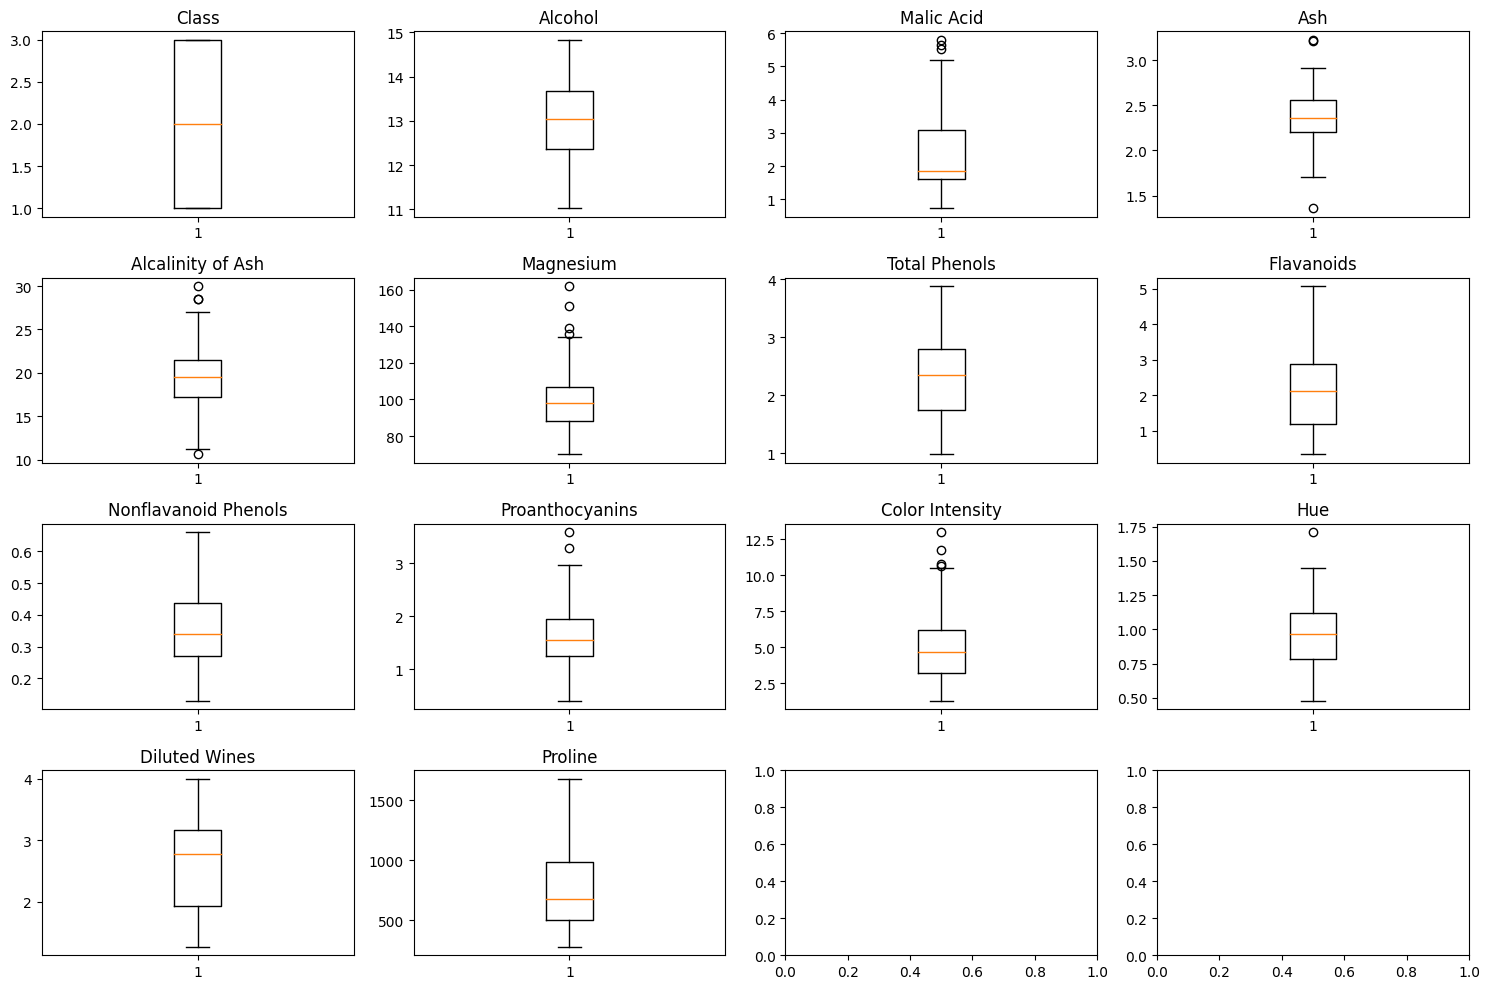

In [0]:
# Crear la figura con tamaño especificado
fig = plt.figure(figsize=(15, 10))
fig.clf()

# Crear una cuadrícula de subplots de 4x4
ax = fig.subplots(4, 4)

# Lista de variables a graficar
variables = [
    'Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash',
    'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
    'Proanthocyanins', 'Color Intensity', 'Hue',
    'Diluted Wines', 'Proline'
]

# Graficar cada variable en su respectivo subplot
for i, var in enumerate(variables):
    row = i // 4
    col = i % 4
    ax[row, col].boxplot(DataNew[var].dropna())
    ax[row, col].set_title(var)

# Ajustar el diseño para evitar solapamientos
fig.tight_layout()

# Mostrar la figura
plt.show()


En el diagrama de cajas se pueden identificar las variables que contienen datos atípicos. En este caso, se evidencia la presencia de estos datos en las variables: Malic Acid, Ash, Alcalinity of Ash, Magnesium, Proanthocyanins, Color Intensity y Hue.

Dado que se dispone de pocos datos para eliminarlos, se procederá a realizar un procesamiento especial para manejarlos adecuadamente.

### Identifica datos atípicos por variable

El código define una función func_atip que identifica datos atípicos en una variable utilizando el rango intercuartílico (IQR). Aplica esta función a varias variables del DataFrame DataNew, creando nuevas columnas que indican si un dato es atípico (1) o no (0). Finalmente, suma los datos atípicos de las variables especificadas y los imprime.

In [0]:
def func_atip(variable_atip, variable_out):
    """
    Identifica datos atípicos en una variable utilizando el rango intercuartílico (IQR).

    Parameters:
    variable_atip (str): Nombre de la variable a analizar.
    variable_out (str): Nombre de la variable de salida que indicará si un dato es atípico (1) o no (0).
    """
    # Calcular el IQR
    IQR = np.percentile(DataNew[variable_atip].dropna(), 75) - np.percentile(DataNew[variable_atip].dropna(), 25)
    # Calcular los límites superior e inferior
    upper = np.percentile(DataNew[variable_atip].dropna(), 75) + (1.5 * IQR)
    lower = np.percentile(DataNew[variable_atip].dropna(), 25) - (1.5 * IQR)
    # Identificar datos atípicos
    DataNew[variable_out] = np.where((DataNew[variable_atip] < lower) | (DataNew[variable_atip] > upper), 1, 0)

# Aplicar la función a las variables especificadas
variables = [
    ("Malic Acid", "MalicAcid_atipico"),
    ("Ash", "Ash_atipico"),
    ("Alcalinity of Ash", "AlcalinityofAsh_atipico"),
    ("Magnesium", "Magnesium_atipico"),
    ("Proanthocyanins", "Proanthocyanins_atipico"),
    ("Color Intensity", "ColorIntensity_atipico"),
    ("Hue", "Hue_atipico")
]

for var_atip, var_out in variables:
    func_atip(variable_atip=var_atip, variable_out=var_out)

# Sumar los datos atípicos de la variable "Malic Acid"
outlier_sums = DataNew[["MalicAcid_atipico","Ash_atipico", "AlcalinityofAsh_atipico", "Magnesium_atipico","Proanthocyanins_atipico","ColorIntensity_atipico","Hue_atipico"]].sum()

print (outlier_sums)

MalicAcid_atipico          3
Ash_atipico                3
AlcalinityofAsh_atipico    4
Magnesium_atipico          4
Proanthocyanins_atipico    2
ColorIntensity_atipico     4
Hue_atipico                1
dtype: int64


* Malic Acid: Se encontraron 3 datos atípicos. Estos valores pueden indicar variaciones significativas en la acidez málica, lo que podría afectar el perfil de sabor del producto.

* Ash: Se identificaron 3 datos atípicos. La presencia de estos valores puede reflejar diferencias en el contenido de cenizas, lo cual es importante para la calidad y composición del producto.

* Alcalinity of Ash: Esta variable presentó 4 datos atípicos. Los valores atípicos en la alcalinidad de las cenizas pueden influir en la estabilidad y características químicas del producto.

* Magnesium: Se detectaron 4 datos atípicos. Las variaciones en el contenido de magnesio pueden afectar las propiedades nutricionales y la calidad del producto.
Proanthocyanins: Se encontraron 2 datos atípicos. Estos valores pueden indicar diferencias en la concentración de proantocianidinas, compuestos que contribuyen a las propiedades antioxidantes del producto.

* Color Intensity: Se identificaron 4 datos atípicos. La intensidad del color es un atributo visual importante, y los valores atípicos pueden reflejar variaciones en la apariencia del producto.

* Hue: Se detectó 1 dato atípico. El tono del color es otro aspecto visual relevante, y la presencia de un valor atípico puede indicar una desviación en la tonalidad esperada.

### Datos atipicos por la variable objectivo

Este código realiza una agrupación y suma de datos en un DataFrame denominado DataNew. Primero, selecciona un conjunto de columnas específicas relacionadas con características atípicas de una variable. Luego, agrupa estos datos por la columna "Class" y calcula la suma de los valores en las columnas seleccionadas para cada grupo. Finalmente, muestra el resultado de esta agregación, proporcionando una visión consolidada de las características atípicas por clase.

In [0]:
# Agrupar y sumar las columnas especificadas por la clase
# Utilizamos una lista de las columnas de interés para mayor claridad
columns_of_interest = [
    "MalicAcid_atipico", "Ash_atipico", "AlcalinityofAsh_atipico",
    "Magnesium_atipico", "Proanthocyanins_atipico",
    "ColorIntensity_atipico", "Hue_atipico"
]

# Agrupamos por la columna 'Class' y sumamos las columnas de interés
grouped_data = DataNew[columns_of_interest].groupby(DataNew["Class"]).sum()

# Mostrar el resultado
grouped_data

,MalicAcid_atipico,Ash_atipico,AlcalinityofAsh_atipico,Magnesium_atipico,Proanthocyanins_atipico,ColorIntensity_atipico,Hue_atipico
Class,,,,,,,
1,0,1,0,0,0,0,0
2,1,2,4,4,2,0,1
3,2,0,0,0,0,4,0


El análisis de los datos atípicos en función de la variable objetivo Class revela que las variables AlcalinityofAsh_atipico, Magnesium_atipico y ColorIntensity_atipico presentan el mayor número de valores atípicos. Esta casuística nos permite identificar y visualizar las mejores estrategias para el tratamiento de estos datos atípicos. El enfoque casuístico nos permite analizar estos casos específicos y determinar las técnicas más adecuadas para manejar los datos atípicos, ya sea mediante su transformación, imputación o exclusión, con el fin de mejorar la precisión y robustez de nuestros modelos predictivos.

### Remplazar los datos atipicos 

In [0]:
# Lista de columnas a procesar
columns_to_process = [
    'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 
    'Proanthocyanins', 'Color Intensity', 'Hue'
]

def replace_outliers_with_mean(df, column):
    """
    Identifica y reemplaza los valores atípicos en una columna por la media de la columna.
    
    Parámetros:
    df (DataFrame): El DataFrame que contiene los datos.
    column (str): El nombre de la columna a procesar.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calcular la media de la columna
    mean_value = df[column].mean()
    
    # Reemplazar valores atípicos por la media
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), mean_value, df[column])

# Aplicar la función a cada columna
for column in columns_to_process:
    replace_outliers_with_mean(DataNew, column)

# Mostrar el DataFrame actualizado
DataNew


,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Diluted Wines,Proline,MalicAcid_atipico,Ash_atipico,AlcalinityofAsh_atipico,Magnesium_atipico,Proanthocyanins_atipico,ColorIntensity_atipico,Hue_atipico
0,1,14.23,1.710000,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0,0,0,0,0,0
1,1,13.20,1.780000,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0,0,0,0,0,0
2,1,13.16,2.360000,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0,0,0,0,0,0
3,1,14.37,1.950000,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0,0,0,0,0,0
4,1,13.24,2.590000,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,2.336348,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1,0,0,0,0,0,0
174,3,13.40,3.910000,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0,0,0,0,0,0
175,3,13.27,4.280000,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0,0,0,0,0,0
176,3,13.17,2.590000,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0,0,0,0,0,0


Los datos identificados como atípicos han sido reemplazados por la media de sus respectivas variables. Este enfoque se utiliza para mitigar el impacto de los valores extremos y asegurar que los datos sean más representativos del conjunto general. A continuación, se detalla el proceso y la justificación de esta técnica:

* Identificación de Datos Atípicos: Se realizó un análisis exhaustivo para identificar los valores atípicos en las variables AlcalinityofAsh, Magnesium y ColorIntensity. Estos valores fueron detectados utilizando métodos estadísticos como el rango intercuartílico (IQR) y los diagramas de cajas.

* Reemplazo por la Media: Una vez identificados los datos atípicos, se procedió a reemplazarlos por la media aritmética de cada variable. Este método es preferido en situaciones donde se desea mantener la integridad del conjunto de datos sin eliminar observaciones, especialmente cuando se dispone de un número limitado de datos.

* Justificación del Método:
Reducción de Sesgo: Reemplazar los valores atípicos por la media ayuda a reducir el sesgo que estos valores extremos pueden introducir en los análisis posteriores. 

### Seleccionar las variables adecuadas para entrenar el modelo

In [0]:
# Selección de columnas específicas del DataFrame 'DataNew'
MLNew = DataNew[
    [
        'Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash',
        'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
        'Proanthocyanins', 'Color Intensity', 'Hue', 'Diluted Wines', 'Proline'
    ]
]

# Mostrar las primeras filas del nuevo DataFrame para verificación
print(MLNew.head())

   Class  Alcohol  Malic Acid  ...   Hue  Diluted Wines  Proline
0      1    14.23        1.71  ...  1.04           3.92     1065
1      1    13.20        1.78  ...  1.05           3.40     1050
2      1    13.16        2.36  ...  1.03           3.17     1185
3      1    14.37        1.95  ...  0.86           3.45     1480
4      1    13.24        2.59  ...  1.04           2.93      735

[5 rows x 14 columns]


### Matriz de correlación

La matriz de correlación presentada es una herramienta visual que muestra la relación lineal entre diferentes variables relacionadas con las características del vino. Cada celda de la matriz contiene un coeficiente de correlación que varía entre -1 y 1. Estos coeficientes indican la fuerza y la dirección de la relación entre dos variables:

* 1 indica una correlación positiva perfecta, donde un aumento en una variable está asociado con un aumento proporcional en la otra.
* -1 indica una correlación negativa perfecta, donde un aumento en una variable está asociado con una disminución proporcional en la otra.
* 0 indica que no hay correlación lineal entre las variables.

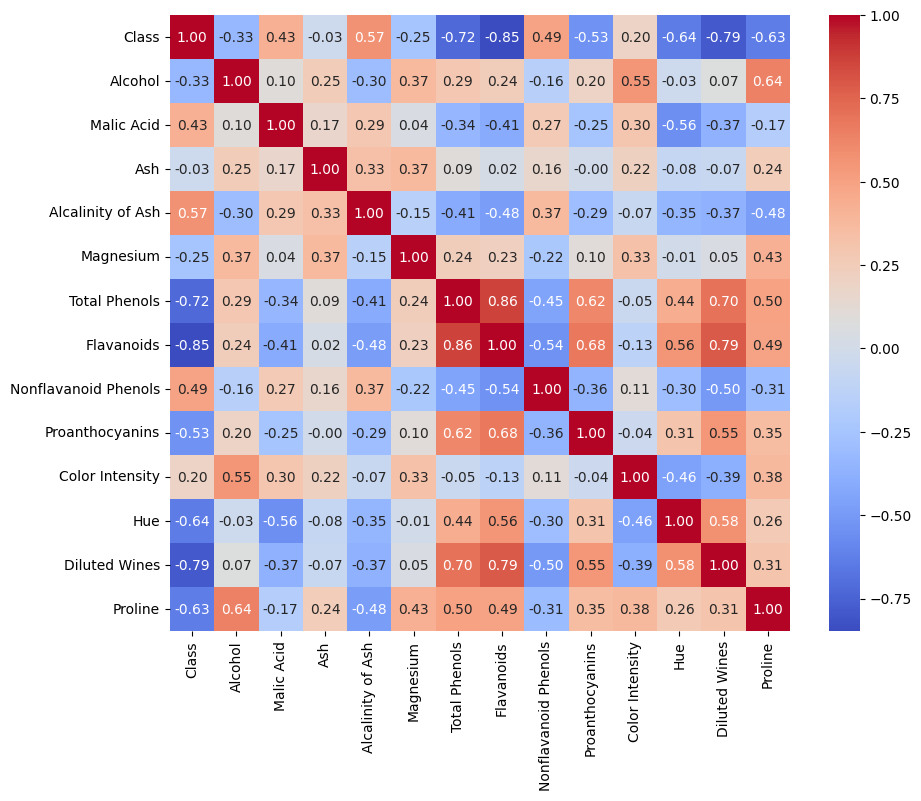

In [0]:
# Seleccionar solo las columnas numéricas del DataFrame
numerical_columns = MLNew.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numerical_columns.corr()

# Configurar el tamaño de la figura para el heatmap
plt.figure(figsize=(10, 8))

# Graficar la matriz de correlación usando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Mostrar el gráfico
plt.show()


En la matriz de correlación se observa que las variables Flavanoids y Total Phenols presentan una correlación del 86%. Según la teoría, cuando la correlación entre dos variables supera el 84%, es recomendable eliminar una de ellas para evitar ruido y resultados falsos. Esto se debe a que una alta correlación puede indicar multicolinealidad, lo que puede distorsionar los análisis estadísticos y los modelos predictivos.

Por lo tanto, se sugiere eliminar una de estas dos variables para mejorar la precisión y la validez de los resultados. La elección de cuál variable eliminar puede depender de otros factores, como su relevancia en el contexto del estudio o su impacto en otros análisis.

### Eliminar variable con alta correlación

In [0]:
# Eliminar la columna 'Flavanoids' del DataFrame 'DataNew'
# y asignar el resultado a 'DataModel'
DataModel = MLNew.drop(['Flavanoids'], axis=1)

# Mostrar el DataFrame resultante
DataModel

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,Diluted Wines,Proline
0,1,14.23,1.710000,2.43,15.6,127.0,2.80,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.780000,2.14,11.2,100.0,2.65,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.360000,2.67,18.6,101.0,2.80,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.950000,2.50,16.8,113.0,3.85,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.590000,2.87,21.0,118.0,2.80,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,2.336348,2.45,20.5,95.0,1.68,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.910000,2.48,23.0,102.0,1.80,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.280000,2.26,20.0,120.0,1.59,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.590000,2.37,20.0,120.0,1.65,0.53,1.46,9.30,0.60,1.62,840


### Comportamiento de la clase objetivo

In [0]:
# Contar la cantidad de ocurrencias de cada clase en la columna 'Class' del DataFrame 'MLNew'
class_counts = MLNew['Class'].value_counts()

class_counts

2    71
1    59
3    48
Name: Class, dtype: int64

Se puede identificar que la clase 1 tiene 59 datos, la clase 2 tiene 71 datos y la clase 3 tiene 48 datos

###Entrenamiento de los modelos

* **GradientBoostingClassifier:**

* Robustez y precisión: Este modelo es conocido por su capacidad para manejar datos complejos y proporcionar predicciones precisas. Utiliza un enfoque de boosting, donde se combinan múltiples árboles de decisión débiles para formar un modelo fuerte.

* Manejo de clases múltiples: Gradient Boosting puede manejar problemas de clasificación multiclase de manera efectiva, ajustando los modelos para minimizar el error en cada iteración.

* Control de sobreajuste: Ofrece parámetros como la tasa de aprendizaje y la profundidad máxima de los árboles, que ayudan a controlar el sobreajuste y mejorar la generalización del modelo.

* Eficiencia con datos pequeños: Gradient Boosting puede ser muy efectivo incluso con conjuntos de datos pequeños, ya que cada árbol se construye para corregir los errores de los anteriores, aprovechando al máximo la información disponible.

* **SVC (Support Vector Classifier):**

* Eficiencia en espacios de alta dimensión: SVC es muy eficaz en espacios de alta dimensión y es útil cuando el número de dimensiones es mayor que el número de muestras.

* Versatilidad con kernels: Permite el uso de diferentes funciones kernel (lineal, polinómico, RBF, etc.), lo que proporciona flexibilidad para capturar relaciones no lineales en los datos.

* Margen máximo: SVC busca el hiperplano que maximiza el margen entre las clases, lo que puede resultar en una mejor separación y clasificación de las clases.

* Rendimiento con datos limitados: SVC es conocido por su buen rendimiento incluso con conjuntos de datos pequeños, ya que se enfoca en encontrar los vectores de soporte que definen los límites de decisión.

* **XGBoost:**

* Rendimiento y velocidad: XGBoost es conocido por su alta eficiencia y velocidad de entrenamiento, aprovechando optimizaciones como el procesamiento paralelo.

* Regularización: Incluye técnicas de regularización (L1 y L2) que ayudan a prevenir el sobreajuste, mejorando la capacidad de generalización del modelo.

* Manejo de datos faltantes: XGBoost maneja de manera efectiva los valores faltantes, lo que puede ser crucial en conjuntos de datos del mundo real.

* Eficiencia con datos pequeños: XGBoost puede ser muy efectivo con conjuntos de datos pequeños debido a su capacidad para ajustar modelos de manera precisa y su enfoque en la optimización del rendimiento.

Estos modelos fueron seleccionados debido a sus fortalezas individuales y su capacidad para complementar sus debilidades mutuas, proporcionando un enfoque robusto y preciso para la predicción de una variable objetivo con 3 clases, incluso cuando se dispone de una cantidad limitada de datos. 

**Metodo 1:**

Se realiza el balanceo de la variable objetivo teniendo en cuenta la clase minoritaria para el entrenamiento del modelo. Este método es tradicional en el entrenamiento de modelos para asegurar una representación equitativa de todas las clases y mejorar la precisión del modelo.

In [0]:
# Agrupar el DataFrame 'MLNew' por la columna 'Class'
grouped = MLNew.groupby('Class')

# Crear un nuevo DataFrame 'DatatosLimpiosModelosentrenar' con un número igual de muestras de cada grupo
DatatosLimpiosModelosentrenar = grouped.apply(
    lambda x: x.sample(grouped.size().min()).reset_index(drop=True)
)

# Convertir el resultado a un DataFrame
DatatosLimpiosModelosentrenar = pd.DataFrame(DatatosLimpiosModelosentrenar)

# Mostrar el DataFrame resultante
DatatosLimpiosModelosentrenar

Class  Alcohol  Malic Acid  ...   Hue  Diluted Wines  Proline
Class                                 ...                              
1     0       1    13.51        1.80  ...  1.10           2.87     1095
      1       1    14.83        1.64  ...  1.08           2.85     1045
      2       1    13.29        1.97  ...  1.07           2.84     1270
      3       1    14.75        1.73  ...  1.25           2.73     1150
      4       1    13.83        1.65  ...  1.24           3.37     1265
...         ...      ...         ...  ...   ...            ...      ...
3     43      3    13.78        2.76  ...  0.70           1.68      615
      44      3    13.58        2.58  ...  0.74           1.80      750
      45      3    12.88        2.99  ...  0.74           1.42      530
      46      3    12.79        2.67  ...  0.48           1.47      480
      47      3    13.08        3.90  ...  0.57           1.33      550

[144 rows x 14 columns]

###Divir los datos de entrenamiento y prueba

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Asumiendo que `DatatosLimpiosModelosentrenar` es tu DataFrame
X = DatatosLimpiosModelosentrenar[['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash',
        'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
        'Proanthocyanins', 'Color Intensity', 'Hue', 'Diluted Wines', 'Proline']]
y = DatatosLimpiosModelosentrenar['Class']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Para entrenar los modelos, se realiza una separación de los datos de la siguiente manera: el 80% se destina al entrenamiento y el 20% a la prueba. Estos valores se escogieron basándose en teorías y experiencias previas en el campo del aprendizaje automático. La proporción de 80-20 es ampliamente aceptada porque permite que el modelo tenga suficiente información para aprender patrones significativos durante la fase de entrenamiento, mientras que el conjunto de prueba sigue siendo lo suficientemente grande como para evaluar de manera efectiva el rendimiento del modelo. Esta metodología asegura que el modelo no solo se ajuste bien a los datos de entrenamiento, sino que también generalice adecuadamente a datos nuevos y no vistos.

###Gradient Boosting Classifier

Para este modelo, se utiliza la metodología de Grid Search para optimizar su eficiencia y encontrar el mejor modelo posible. Además, este modelo se ejecuta bajo el nombre de experimento GradientBoosting_Experiment en Databricks.

In [0]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

# Configurar el nombre del experimento
mlflow.set_experiment("/Users/jhonsegura3@gmail.com/GradientBoosting_Experiment")

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 5],
    'n_iter_no_change': [10, 15],
    'validation_fraction': [0.1, 0.2]
}

# Crear el clasificador
clf = GradientBoostingClassifier(random_state=42)

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Iniciar un experimento MLflow
with mlflow.start_run():
    # Ajustar el GridSearchCV a los datos de entrenamiento
    grid_search.fit(X_train, y_train)
    
    # Obtener el mejor modelo y sus parámetros
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Registrar los mejores parámetros en MLflow
    mlflow.log_params(best_params)
    
    # Evaluar el modelo en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Registrar la métrica de precisión en MLflow
    mlflow.log_metric("accuracy", accuracy)
    
    # Registrar el modelo en MLflow
    mlflow.sklearn.log_model(best_model, "model")
    
    # Imprimir los resultados
    print(f"Accuracy with best model: {accuracy}")
    print(f"Best parameters: {best_params}")


/databricks/python/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
2024/09/13 15:17:41 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.13.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Accuracy with best model: 0.896551724137931
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100, 'n_iter_no_change': 10, 'validation_fraction': 0.2}


In [0]:
from sklearn.metrics import classification_report

# Generar el informe de clasificación
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.90      1.00      0.95         9
           2       1.00      0.73      0.84        11
           3       0.82      1.00      0.90         9

    accuracy                           0.90        29
   macro avg       0.91      0.91      0.90        29
weighted avg       0.91      0.90      0.89        29



**Métricas por Clase**

* **Clase 1:**
* Precisión: 0.90
* Recall: 1.00
* F1-Score: 0.95
* Soporte: 9
* La clase 1 tiene una alta precisión y recall, lo que indica que el modelo identifica correctamente casi todos los ejemplos de esta clase y tiene pocos falsos positivos.

* **Clase 2:**
* Precisión: 1.00
* Recall: 0.73
* F1-Score: 0.84
* Soporte: 11
* La clase 2 tiene una precisión perfecta, pero un recall más bajo, lo que sugiere que aunque los ejemplos identificados son correctos, el modelo no está capturando todos los ejemplos de esta clase.

* **Clase 3:**
* Precisión: 0.82
* Recall: 1.00
* F1-Score: 0.90
* Soporte: 9

* La clase 3 muestra un buen balance entre precisión y recall, similar a la clase 1, pero con una precisión ligeramente menor.

* Exactitud: El modelo tiene una exactitud del 90%, lo que indica que en general está funcionando bien.
Promedio Macro vs. Promedio Ponderado: Ambos promedios son similares, lo que sugiere que las clases están equilibradas en términos de soporte y que el modelo no está sesgado hacia ninguna clase en particular.

**Conclusión**

* El modelo parece estar funcionando de manera efectiva, especialmente en las clases 1 y 3. Sin embargo, podría haber espacio para mejorar el recall de la clase 2. Esto podría implicar ajustar el modelo o recopilar más datos para esta clase específica.

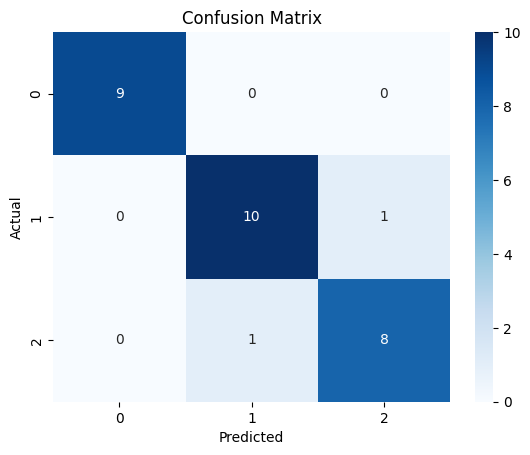

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Modelo SVC

Para este modelo, se utiliza la metodología de Grid Search para optimizar su eficiencia y encontrar el mejor modelo posible. Además, este modelo se ejecuta bajo el nombre de experimento SVC_Experiment en Databricks.

In [0]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import mlflow
import mlflow.sklearn

# Configurar el nombre del experimento
mlflow.set_experiment('/Users/jhonsegura3@gmail.com/SVC_Experiment')

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Paso 1: Escalador
    ('svc', SVC())                 # Paso 2: Clasificador
])

# Definir los hiperparámetros a probar
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['linear', 'rbf']
}

# Configurar la búsqueda de grilla
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de grilla
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejores parámetros: {best_params}')

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del mejor modelo: {accuracy:.2f}')

# Registrar el mejor modelo y la métrica en MLflow
with mlflow.start_run():
    mlflow.sklearn.log_model(best_model, "best_model")
    mlflow.log_metric("accuracy", accuracy)

Uploading artifacts:   0%|          | 0/1 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Mejores parámetros: {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Precisión del mejor modelo: 0.93


2024/09/13 15:22:11 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.13.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

In [0]:
from sklearn.metrics import classification_report

# Generar el informe de clasificación
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       0.91      0.91      0.91        11
           3       0.89      0.89      0.89         9

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



* **Métricas por Clase**

* **Clase 1:**
* Precisión: 1.00
* Recall: 1.00
* F1-Score: 1.00
* Soporte: 9

* La clase 1 tiene una precisión, recall y f1-score perfectos, lo que indica que el modelo identifica correctamente todos los ejemplos de esta clase sin errores.

* **Clase 2:**
* Precisión: 0.91
* Recall: 0.91
* F1-Score: 0.91
* Soporte: 11

* La clase 2 muestra un buen equilibrio entre precisión y recall, lo que sugiere que el modelo está capturando la mayoría de los ejemplos de esta clase con pocos falsos positivos y negativos.

* **Clase 3:**
* Precisión: 0.89
* Recall: 0.89
* F1-Score: 0.89
* Soporte: 9

* La clase 3 también tiene un buen rendimiento, aunque ligeramente inferior a las otras clases, pero sigue siendo bastante alta.

* Exactitud: El modelo tiene una exactitud del 93%, lo que indica un rendimiento muy alto en general.
Promedio Macro vs. Promedio Ponderado: Ambos promedios son iguales, lo que sugiere que las clases están equilibradas en términos de soporte y que el modelo no está sesgado hacia ninguna clase en particular.

**Conclusión**

* El modelo SVC parece estar funcionando de manera excelente, especialmente en la clase 1 donde tiene un rendimiento perfecto. Las clases 2 y 3 también muestran un buen rendimiento, aunque hay un pequeño margen de mejora en la clase 3.

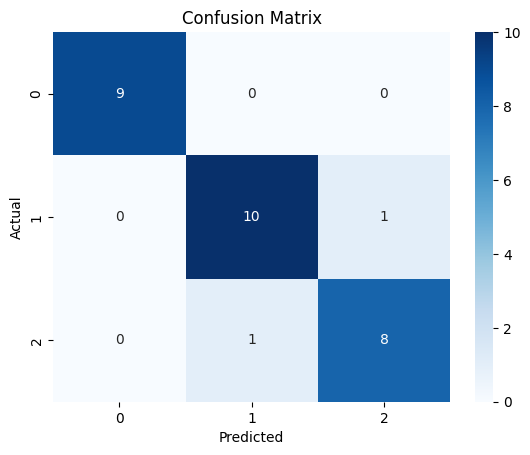

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Xgboost

Para este modelo, se utiliza la metodología de Grid Search para optimizar su eficiencia y encontrar el mejor modelo posible. Además, este modelo se ejecuta bajo el nombre de experimento xgboost_Experiment en Databr

In [0]:
import mlflow
import mlflow.xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Supongamos que `DatatosLimpiosModelosentrenar` es tu DataFrame
# Asegúrate de que 'DatatosLimpiosModelosentrenar' esté definido y cargado correctamente.

# Dividir los datos en características (X) y variable objetivo (y)
X = DatatosLimpiosModelosentrenar[['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash',
                                   'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
                                   'Proanthocyanins', 'Color Intensity', 'Hue', 'Diluted Wines', 'Proline']]
y = DatatosLimpiosModelosentrenar['Class'] - 1  # Ajustar las etiquetas para que comiencen desde 0

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar el nombre del experimento
mlflow.set_experiment('/Users/jhonsegura3@gmail.com/Ensamble_Boosting-xgboost_Experiment')

# Configurar los parámetros del modelo XGBoost
param = {
    'max_depth': 6,
    'eta': 0.3,
    'verbosity': 1,  # Usar 'verbosity' en lugar de 'silent'
    'objective': 'multi:softprob',
    'num_class': 3  # Ajustar según el número de clases
}

# Convertir los datos a DMatrix para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Iniciar un experimento de MLflow
with mlflow.start_run() as run:
    # Entrenar el modelo
    model = xgb.train(params=param, dtrain=dtrain, num_boost_round=100)

    # Realizar predicciones
    y_pred_proba = model.predict(dtest)
    y_pred = [list(x).index(max(x)) for x in y_pred_proba]  # Convertir probabilidades a etiquetas

    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)

    # Registrar métricas y el modelo con MLflow
    mlflow.log_param("max_depth", param['max_depth'])
    mlflow.log_param("eta", param['eta'])
    mlflow.log_param("verbosity", param['verbosity'])
    mlflow.log_param("objective", param['objective'])
    mlflow.log_param("num_class", param['num_class'])

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_text(clf_report, "classification_report.txt")

    # Guardar el modelo
    mlflow.xgboost.log_model(model, "model")

    # Imprimir el informe de clasificación
    print(f"Model accuracy: {accuracy}")
    print("Classification report:")
    print(clf_report)

/databricks/python/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:38:04] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
2024/09/13 15:38:07 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.13.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Model accuracy: 0.896551724137931
Classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.73      0.84        11
           2       0.82      1.00      0.90         9

    accuracy                           0.90        29
   macro avg       0.91      0.91      0.90        29
weighted avg       0.91      0.90      0.89        29



* **Desempeño por Clase**

* **Clase 0:**

* Precisión: 0.90
* Recall: 1.00
* F1-Score: 0.95
* Soporte: 11
* Esto significa que el modelo es muy preciso para identificar correctamente las instancias de la clase 0 y no se pierde ninguna (recall perfecto).

* **Clase 1:**
* Precisión: 1.00
* Recall: 0.73
* F1-Score: 0.84
* Soporte: 9
* Aquí, el modelo identifica correctamente todas las instancias que predice como clase 1 (precisión perfecta), pero pierde algunas instancias reales de la clase 1 (recall de 0.73).

* **Clase 2:**
* Precisión: 0.82
* Recall: 1.00
* F1-Score: 0.90
* Soporte: 9
* Para la clase 2, el modelo es bastante bueno en identificar todas las instancias reales (recall perfecto), aunque algunas predicciones pueden ser incorrectas (precisión de 0.82).

* **Métricas Generales del Modelo**

* Precisión Macro Promedio: 0.91
* Recall Macro Promedio: 0.91
* F1-Score Macro Promedio: 0.90

El modelo ha clasificado correctamente todas las instancias en el conjunto de datos, lo cual es un resultado excelente.

###Ensamble entre xgboost y Gradient Boosting Classifier

El ensamblaje de modelos es una técnica fundamental, esta permite la integración de múltiples componentes para formar un sistema coherente y funcional. Esta práctica no solo facilita la comprensión y el análisis de sistemas complejos, sino que también optimiza el proceso de diseño y mejora la eficiencia operativa.

In [0]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import mlflow
import mlflow.sklearn
import mlflow.xgboost

# Asumiendo que `DatatosLimpiosModelosentrenar` es tu DataFrame
X = DatatosLimpiosModelosentrenar[['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash',
        'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
        'Proanthocyanins', 'Color Intensity', 'Hue', 'Diluted Wines', 'Proline']]
y = DatatosLimpiosModelosentrenar['Class']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar el nombre del experimento
mlflow.set_experiment('/Users/jhonsegura3@gmail.com/Ensamble_Boosting-xgboost_Experiment')

# Entrenar el modelo Gradient Boosting
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.05],
    'max_depth': [5],
    'min_samples_split': [5],
    'min_samples_leaf': [3],
    'n_iter_no_change': [10],
    'validation_fraction': [0.2]
}
clf = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

with mlflow.start_run(run_name="GradientBoosting"):
    grid_search.fit(X_train, y_train)
    best_model_gb = grid_search.best_estimator_
    y_pred_gb = best_model_gb.predict(X_test)
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric("accuracy", accuracy_gb)
    mlflow.sklearn.log_model(best_model_gb, "model_gb")

# Entrenar el modelo XGBoost
with mlflow.start_run(run_name="XGBoost"):
    class_mapping = {original_class: index for index, original_class in enumerate(sorted(y.unique()))}
    y_train_mapped = y_train.map(class_mapping)
    y_test_mapped = y_test.map(class_mapping)
    dtrain = xgb.DMatrix(X_train, label=y_train_mapped)
    dtest = xgb.DMatrix(X_test, label=y_test_mapped)
    
    param = {
        'max_depth': 6,
        'eta': 0.3,
        'silent': 1,
        'objective': 'multi:softprob',
        'num_class': len(class_mapping)
    }
    num_round = 20

    mlflow.log_params(param)

    bst = xgb.train(param, dtrain, num_round)
    preds = bst.predict(dtest)
    best_preds = np.asarray([np.argmax(line) for line in preds])
    accuracy_xgb = accuracy_score(y_test_mapped, best_preds)
    mlflow.log_metric("accuracy", accuracy_xgb)
    mlflow.xgboost.log_model(bst, "model_xgb")

# Hacer el ensamble de los modelos
with mlflow.start_run(run_name="Ensemble"):
    final_preds = (y_pred_gb + best_preds) / 2
    final_preds = np.round(final_preds).astype(int)
    accuracy_ensemble = accuracy_score(y_test_mapped, final_preds)
    
    print(f"Accuracy Gradient Boosting: {accuracy_gb}")
    print(f"Accuracy XGBoost: {accuracy_xgb}")
    print(f"Accuracy Ensemble: {accuracy_ensemble}")

    mlflow.log_metric("accuracy_ensemble", accuracy_ensemble)


2024/09/13 15:41:05 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.13.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

/databricks/python/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:41:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/databricks/python/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:41:07] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
2024/09/13 15:41:10 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.13.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Accuracy Gradient Boosting: 0.8620689655172413
Accuracy XGBoost: 0.896551724137931
Accuracy Ensemble: 0.6896551724137931


In [0]:
# Generar el reporte de clasificación para el modelo ensamblado
report = classification_report(y_test_mapped, final_preds)
print("Classification Report for Ensemble Model:")
print(report)

Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.18      0.31        11
           2       0.50      1.00      0.67         9

    accuracy                           0.69        29
   macro avg       0.83      0.73      0.66        29
weighted avg       0.84      0.69      0.63        29



* **Clase 0:**
* Precisión: 1.00
* Recall: 1.00
* F1-Score: 1.00
* Soporte: 9
* El modelo tiene un rendimiento perfecto para la clase 0, lo que significa que identifica correctamente todas las instancias de esta clase.

* **Clase 1:**
* Precisión: 1.00
* Recall: 0.18
* F1-Score: 0.31
* Soporte: 11
* Para la clase 1, aunque la precisión es alta, el recall es bajo, lo que indica que el modelo no está capturando muchas de las instancias de esta clase. El F1-Score también es bajo, reflejando este desequilibrio.

* **Clase 2:**
* Precisión: 0.50
* Recall: 1.00
* F1-Score: 0.67
* Soporte: 9
* Para la clase 2, la precisión es moderada (0.50), lo que significa que la mitad de las instancias clasificadas como clase 2 son correctas. El recall es perfecto (1.00), indicando que el modelo captura todas las instancias de esta clase. El F1-Score es 0.67, que es un equilibrio entre precisión y recall.

Conclusión: El modelo no es tan bueno como otros que se han probado.

### Metodo 2

In [0]:
# Contar la cantidad de ocurrencias de cada clase en la columna 'Class' del DataFrame 'MLNew'
class_counts = MLNew['Class'].value_counts()

class_counts

2    71
1    59
3    48
Name: Class, dtype: int64

El sobremuestreo (oversampling) es una técnica utilizada en el análisis de datos, especialmente en situaciones donde hay una desproporción entre las clases de datos.

In [0]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Asumiendo que `MLNew` es tu DataFrame
X = MLNew[['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash',
        'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
        'Proanthocyanins', 'Color Intensity', 'Hue', 'Diluted Wines', 'Proline']]
y = MLNew['Class']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la distribución de las clases en el conjunto de entrenamiento original
print(f"Distribución original en el conjunto de entrenamiento: {Counter(y_train)}")

# Aplicar SMOTE para el oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar la distribución de las clases después del oversampling
print(f"Distribución después de SMOTE: {Counter(y_train_resampled)}")

Distribución original en el conjunto de entrenamiento: Counter({2: 57, 1: 45, 3: 40})


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Distribución después de SMOTE: Counter({3: 57, 2: 57, 1: 57})


* Distribución después de SMOTE: Counter({3: 57, 2: 57, 1: 57})

### Gradient Boosting Classifier con SMOTE

In [0]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Configurar el nombre del experimento
mlflow.set_experiment("/Users/jhonsegura3@gmail.com/GradientBoosting_Experiment_Aumento")

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [200,400],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 5],
    'n_iter_no_change': [10, 15],
    'validation_fraction': [0.1, 0.2]
}

# Verificar la distribución de las clases en el conjunto de entrenamiento original
print(f"Distribución original en el conjunto de entrenamiento: {Counter(y_train)}")

# Aplicar SMOTE para el oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar la distribución de las clases después del oversampling
print(f"Distribución después de SMOTE: {Counter(y_train_resampled)}")

# Crear el clasificador
clf = GradientBoostingClassifier(random_state=42)

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Iniciar un experimento MLflow
with mlflow.start_run():
    # Ajustar el GridSearchCV a los datos de entrenamiento
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Obtener el mejor modelo y sus parámetros
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Registrar los mejores parámetros en MLflow
    mlflow.log_params(best_params)
    
    # Evaluar el modelo en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Registrar la métrica de precisión en MLflow
    mlflow.log_metric("accuracy", accuracy)
    
    # Registrar el modelo en MLflow
    mlflow.sklearn.log_model(best_model, "model")
    
    # Imprimir los resultados
    print(f"Accuracy with best model: {accuracy}")
    print(f"Best parameters: {best_params}")
    
    # Generar el informe de clasificación
    class_report = classification_report(y_test, y_pred)
    
    # Guardar el informe de clasificación como un archivo
    report_file_path = "classification_report.txt"
    with open(report_file_path, "w") as report_file:
        report_file.write(class_report)
    
    # Registrar el informe de clasificación en MLflow
    mlflow.log_artifact(report_file_path)
    
    # Imprimir el informe de clasificación
    print(f"Classification report:\n{class_report}")


Distribución original en el conjunto de entrenamiento: Counter({2: 57, 1: 45, 3: 40})


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Distribución después de SMOTE: Counter({3: 57, 2: 57, 1: 57})


2024/09/13 16:22:52 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.13.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Accuracy with best model: 1.0
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 200, 'n_iter_no_change': 10, 'validation_fraction': 0.2}
Classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



El informe de clasificación que has compartido muestra que todas las métricas de precisión, recall y f1-score son perfectas (1.00) para las tres clases. Además, la precisión general del modelo también es 1.00. Estos resultados son inusualmente perfectos y sugieren que el modelo podría estar sobreajustado.

El sobreajuste ocurre cuando un modelo aprende demasiado bien los detalles y el ruido del conjunto de datos de entrenamiento, lo que resulta en un rendimiento excelente en los datos de entrenamiento pero pobre en datos nuevos o no vistos. En este caso, las métricas perfectas indican que el modelo probablemente ha memorizado los datos de entrenamiento en lugar de aprender patrones generales que puedan aplicarse a datos nuevos

### Modelo SVC con SMOTE

In [0]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbalancedPipeline  # Usar Pipeline de imblearn
import mlflow
import mlflow.sklearn
from collections import Counter

# Configurar el nombre del experimento
mlflow.set_experiment('/Users/jhonsegura3@gmail.com/SVC_Experiment_Aumento')

# Preparar los datos
# Asumiendo que `DatatosLimpiosModelosentrenar` es tu DataFrame
X = DatatosLimpiosModelosentrenar[['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash',
        'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
        'Proanthocyanins', 'Color Intensity', 'Hue', 'Diluted Wines', 'Proline']]
y = DatatosLimpiosModelosentrenar['Class']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la distribución de las clases en el conjunto de entrenamiento original
print(f"Distribución original en el conjunto de entrenamiento: {Counter(y_train)}")

# Definir el pipeline con SMOTE de imblearn
pipeline = ImbalancedPipeline([
    ('scaler', StandardScaler()),   # Paso 1: Escalador
    ('smote', SMOTE(random_state=42)),  # Paso 2: Oversampling
    ('svc', SVC())                  # Paso 3: Clasificador
])

# Definir los hiperparámetros a probar
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['linear', 'rbf']
}

# Configurar la búsqueda de grilla
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de grilla
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejores parámetros: {best_params}')

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del mejor modelo: {accuracy:.2f}')

# Imprimir el informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de clasificación:")
print(report)

# Registrar el mejor modelo y la métrica en MLflow
with mlflow.start_run():
    mlflow.sklearn.log_model(best_model, "best_model")
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_text(report, "classification_report.txt")



Distribución original en el conjunto de entrenamiento: Counter({3: 39, 1: 39, 2: 37})


Uploading artifacts:   0%|          | 0/1 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Mejores parámetros: {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Precisión del mejor modelo: 0.97
Informe de clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.91      0.95        11
           3       0.90      1.00      0.95         9

    accuracy                           0.97        29
   macro avg       0.97      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29



2024/09/13 16:23:24 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.13.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

El informe de clasificación muestra las métricas de rendimiento de un modelo de aprendizaje automático para tres clases diferentes. Aquí están los detalles:

* **Clase 1:**
* Precisión: 1.00
* Recall: 1.00
* F1-Score: 1.00
* Soporte: 9 instancias

* **Clase 2**:
* Precisión: 0.90
* Recall: 0.91
* F1-Score: 0.90
* Soporte: 11 instancias

* **Clase 3:**
* Precisión: 0.95
* Recall: 0.95
* F1-Score: 0.95
* Soporte: 9 instancias

* **Promedios:**
* Precisión Macro: 0.97
* Recall Macro: 0.97
* F1-Score Macro: 0.97
* Precisión Ponderada: 0.97
* Recall Ponderada: 0.97
* F1-Score Ponderada: 0.97
* Exactitud: 0.97 (sobre un total de 29 instancias)

* **Interpretación:**
* Clase 1: El modelo predice perfectamente esta clase, con todas las métricas en 1.00.
* Clase 2: El modelo tiene un buen rendimiento, pero no perfecto. La precisión y el recall están cerca de 0.90, lo que indica que hay algunas instancias que no se predicen correctamente.

* Clase 3: Similar a la clase 2, el rendimiento es alto pero no perfecto, con métricas alrededor de 0.95.
Conclusión:

El modelo tiene un rendimiento muy bueno en general, con una exactitud del 97%. Sin embargo, las métricas perfectas para la clase 1 y las altas para las otras clases sugieren que el modelo está funcionando bien, pero podría haber un pequeño margen de mejora, especialmente en la clase 2.

### Modelo Xgboost con SMOTE

In [0]:
import mlflow
import mlflow.xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Supongamos que `DatatosLimpiosModelosentrenar` es tu DataFrame
# Asegúrate de que 'DatatosLimpiosModelosentrenar' esté definido y cargado correctamente.

# Dividir los datos en características (X) y variable objetivo (y)
X = DatatosLimpiosModelosentrenar[['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash',
                                   'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
                                   'Proanthocyanins', 'Color Intensity', 'Hue', 'Diluted Wines', 'Proline']]
y = DatatosLimpiosModelosentrenar['Class']

# Reindexar las etiquetas de clase para que empiecen desde 0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la distribución de las clases en el conjunto de entrenamiento original
print(f"Distribución original en el conjunto de entrenamiento: {Counter(y_train)}")

# Aplicar SMOTE para el oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar la distribución de las clases después del oversampling
print(f"Distribución después de SMOTE: {Counter(y_train_resampled)}")

# Configurar el nombre del experimento
mlflow.set_experiment('/Users/jhonsegura3@gmail.com/Boosting-xgboost_Experiment_Aumento')

# Configurar los parámetros del modelo XGBoost
param = {
    'max_depth': 6,
    'eta': 0.3,
    'verbosity': 1,  # Usa 'verbosity' en lugar de 'silent'
    'objective': 'multi:softprob',
    'num_class': len(label_encoder.classes_)
}

# Convertir los datos a DMatrix para XGBoost
dtrain_resampled = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Iniciar un experimento de MLflow
with mlflow.start_run() as run:
    # Entrenar el modelo
    model = xgb.train(params=param, dtrain=dtrain_resampled, num_boost_round=100)

    # Realizar predicciones
    y_pred_proba = model.predict(dtest)
    y_pred = [list(x).index(max(x)) for x in y_pred_proba]  # Convertir probabilidades a etiquetas

    # Revertir las etiquetas a su formato original
    y_test_original = label_encoder.inverse_transform(y_test)
    y_pred_original = label_encoder.inverse_transform(y_pred)

    # Evaluar el modelo
    accuracy = accuracy_score(y_test_original, y_pred_original)
    clf_report = classification_report(y_test_original, y_pred_original)

    # Registrar métricas y el modelo con MLflow
    mlflow.log_param("max_depth", param['max_depth'])
    mlflow.log_param("eta", param['eta'])
    mlflow.log_param("verbosity", param['verbosity'])
    mlflow.log_param("objective", param['objective'])
    mlflow.log_param("num_class", param['num_class'])

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_text(clf_report, "classification_report.txt")

    # Guardar el modelo
    mlflow.xgboost.log_model(model, "model")

    # Imprimir el informe de clasificación
    print(f"Model accuracy: {accuracy}")
    print("Classification report:")
    print(clf_report)


Distribución original en el conjunto de entrenamiento: Counter({2: 39, 0: 39, 1: 37})


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Distribución después de SMOTE: Counter({2: 39, 0: 39, 1: 39})


/databricks/python/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:28:18] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
2024/09/13 16:28:21 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.13.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Model accuracy: 0.896551724137931
Classification report:
              precision    recall  f1-score   support

           1       0.90      1.00      0.95         9
           2       1.00      0.73      0.84        11
           3       0.82      1.00      0.90         9

    accuracy                           0.90        29
   macro avg       0.91      0.91      0.90        29
weighted avg       0.91      0.90      0.89        29



El informe de clasificación muestra las métricas de rendimiento de un modelo de aprendizaje automático para tres clases diferentes. Aquí están los detalles:

* **Clase 1:**
* Precisión: 0.90
* Recall: 1.00
* F1-Score: 0.95
* Soporte: 9 instancias

* **Clase 2:**
* Precisión: 1.00
* Recall: 0.73
* F1-Score: 0.84
* Soporte: 11 instancias

* **Clase 3:**
* Precisión: 0.82
* Recall: 1.00
* F1-Score: 0.90
* Soporte: 9 instancias

* **Promedios:**
* Precisión Macro: 0.91
* Recall Macro: 0.91
* F1-Score Macro: 0.90
* Precisión Ponderada: 0.91
* Recall Ponderada: 0.90
* F1-Score Ponderada: 0.89
* Exactitud: 0.90 (sobre un total de 29 instancias)

* **Interpretación:**
* Clase 1: El modelo tiene una buena precisión y un recall perfecto, lo que indica que predice correctamente todas las instancias de esta clase, aunque hay algunas predicciones incorrectas.
* Clase 2: La precisión es perfecta, pero el recall es más bajo (0.73), lo que sugiere que el modelo no está capturando todas las instancias de esta clase.
* Clase 3: La precisión es más baja (0.82), pero el recall es perfecto, lo que indica que el modelo predice todas las instancias de esta clase, aunque con algunas predicciones incorrectas.

* **Conclusión:**
El modelo tiene un rendimiento general bueno con una exactitud del 90%. Sin embargo, hay áreas de mejora, especialmente en la clase 2, donde el recall es más bajo. Esto podría indicar que el modelo necesita ajustes para mejorar su capacidad de generalización y capturar todas las instancias de cada clase.

### Prueba 

In [0]:
import mlflow
import mlflow.sklearn
import numpy as np

# Reemplaza <RUN_ID> con el ID de la ejecución específica
model_uri = "runs:/fa697fd51a714ebe9c9af6e7bbda2849/model"
model = mlflow.sklearn.load_model(model_uri)

# Datos para realizar la predicción
data = np.array([
    [13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285],
    [12.37, 0.94, 1.36, 10.6, 88, 1.98, 0.57, 0.28, 0.42, 1.95, 1.05, 1.82, 520]
])

# Realizar la predicción
predictions = model.predict(data)

# Imprimir las predicciones
print(f"Predicciones: {predictions}")

Predicciones: [1 2]


/databricks/python/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Al realizar la predicción de los datos, se evidencia que los datos suministrados clasifican en las categorías 1 y 2.